In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
operations = pd.read_csv("data/operations/operations_cleaned.csv", low_memory=False)
weapons = pd.read_csv('data/operations/weapon.csv', encoding='latin-1')
aircrafts = pd.read_csv("data/operations/aircraft.csv", encoding='latin-1')

# Introduction
This project aims to analyze data related to the Vietnam War to answer the following questions:
1. What are the areas with high risk of UXO in Vietnam?
2. What would be the estimated clean up cost?
3. Where should we focus on cleaning up UXO?

There are different types of explosive remnants of war (ERW) like hand grenades, mines, etc. But in this notebook, we will only focus on ERW used in US Airforce missions, especially bombs.

# 1. Importing data

In [3]:
# Operation data
operations.head(5)

,Unnamed: 0,THOR_DATA_VIET_ID,COUNTRYFLYINGMISSION,MILSERVICE,MSNDATE,SOURCEID,SOURCERECORD,VALID_AIRCRAFT_ROOT,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,TGTTYPE,NUMWEAPONSDELIVERED,TIMEONTARGET,WEAPONTYPE,WEAPONTYPECLASS,WEAPONTYPEWEIGHT,AIRCRAFT_ORIGINAL,AIRCRAFT_ROOT,AIRFORCEGROUP,AIRFORCESQDN,CALLSIGN,FLTHOURS,MFUNC,MFUNC_DESC,MISSIONID,NUMOFACFT,OPERATIONSUPPORTED,PERIODOFDAY,UNIT,TGTCLOUDCOVER,TGTCONTROL,TGTCOUNTRY,TGTID,TGTORIGCOORDS,TGTORIGCOORDSFORMAT,TGTWEATHER,ADDITIONALINFO,GEOZONE,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
0,0,351,UNITED STATES OF AMERICA,USAF,1971-06-05,647464,SEADAB,EC-47,TAN SON NHUT,NaN,NaN,NaN,0,1005.0,NaN,NaN,0,EC47,EC47,NaN,NaN,STEEL 5,70,34.0,RADIO DIRECT FINDER,2624,1,NaN,D,360TEW,NaN,NaN,CAMBODIA,NaN,NaN,NaN,NaN,UNIT: 360TEW - CALLSIGN: STEEL 5,NaN,27135863,NONKINETIC,-1,-1,NaN,NaN,NaN,1005.0,0
1,1,2,UNITED STATES OF AMERICA,USAF,1972-12-26,642778,SEADAB,EC-47,NAKHON PHANOM,NaN,NaN,NaN,0,530.0,NaN,NaN,0,EC47,EC47,NaN,NaN,BARON 6,0,74.0,EXTRACTION (GPES),2909,1,NaN,D,361TEW,NaN,NaN,SOUTH VIETNAM,NaN,NaN,NaN,NaN,UNIT: 361TEW - CALLSIGN: BARON 6,NaN,27131177,NONKINETIC,-1,-1,NaN,NaN,NaN,530.0,0
2,2,3,UNITED STATES OF AMERICA,USAF,1973-07-28,642779,SEADAB,RF-4,UDORN AB,NaN,NaN,NaN,0,730.0,NaN,NaN,0,RF4,RF4,NaN,NaN,ATLANTA,30,18.0,VISUAL RECCE,3059,1,NaN,D,432TRW,NaN,NaN,LAOS,NaN,NaN,NaN,NaN,UNIT: 432TRW - CALLSIGN: ATLANTA,NaN,27131178,NONKINETIC,-1,-1,NaN,NaN,NaN,730.0,0
3,3,4,UNITED STATES OF AMERICA,USAF,1970-02-02,642780,SEADAB,A-1,NAKHON PHANOM,16.902500,106.014166,TRUCKS,2,1415.0,BLU27 FIRE BOMB (750),NaN,750,A1,A1,NaN,NaN,FF32,68,1.0,STRIKE,1047,2,NaN,N,56SOW,NaN,NaN,LAOS,NaN,165409N1060051E,DDMMSSN DDDMMSSE,NaN,UNIT: 56SOW - CALLSIGN: FF32,XE,27131179,KINETIC,-1,-1,NaN,NaN,SECONDARY FIRE,1415.0,17400
4,4,5,VIETNAM (SOUTH),VNAF,1970-10-08,642781,SEADAB,A-37,DANANG,14.945555,108.257222,BASE CAMP AREA,0,1240.0,NaN,NaN,0,A37,A37,NaN,NaN,TIGER 41,28,5.0,CLOSE AIR SUPPORT,B542,2,NaN,D,516FS,NaN,NaN,SOUTH VIETNAM,NaN,145644N1081526E,DDMMSSN DDDMMSSE,NaN,UNIT: 516FS - CALLSIGN: TIGER 41,ZB,27131180,KINETIC,-1,-1,NaN,NaN,RNO WEATHER,1240.0,0


In [4]:
# Weapon data
weapons.head(5)

,WEAPON_ID,WEAPONTYPE,WEAPONTYPE_COMMON_NAME,WEAPON_CLASS,WEAPONTYPE_DESC,WEAPON_COUNT
0,1,100 GP,General Purpose Bomb,BOMB,100 lb general purpose,1
1,2,1000 G,Megaboller flash powder bomb,BOMB,1000 g BKS,2
2,3,1000LB GP M-65,An-M65,BOMB,1000 lb general purpose,12776
3,4,1000LB MK-83,Mark 83 bomb,BOMB,1000 lb none guidence general purpose bomb,15522
4,5,1000LB SAP M59,AN-M59,BOMB,1000 lb semi-armor piercing bomb,454


In [5]:
# Aircraft data
aircrafts.head(5)

,GLOSS_ID,VALIDATED_ROOT,AIRCRAFT_NAME,WEBSITE_LINK,AIRCRAFT_TYPE,AIRCRAFT_SHORTNAME,AIRCRAFT_APPLICATION,AC_MISSION_COUNT
0,1,A-1,Douglas A-1 Skyraider,http://www.navalaviationmuseum.org/attractions...,Fighter Jet,Skyraider,FIGHTER,373265
1,2,A-26,Douglas A-26 Invader,http://www.militaryfactory.com/aircraft/detail...,Light Bomber,Invader,BOMBER,36672
2,4,A-37,Cessna A-37 Dragonfly,http://www.militaryfactory.com/aircraft/detail...,Light ground-attack aircraft,Dragonfly,ATTACK,282699
3,5,A-4,McDonnell Douglas A-4 Skyhawk,http://www.fighter-planes.com/info/a4-skyhawk.htm,Fighter Jet,Skyhawk,FIGHTER,390290
4,6,A-5,North American A-5 Vigilante,http://www.militaryfactory.com/aircraft/detail...,Bomber Jet,Vigilante,BOMBER,10


# 2. Data cleaning and processing
* Since we only care about UXO, we should select weapons that contain explosives like rocket or bombs

## 2.1. Viewing the weapon data in weapons.csv

In [6]:
weapons['WEAPON_CLASS'].unique()

array(['BOMB', 'GUN', 'ROCKET', 'SUPPORT', 'MISSILE'], dtype=object)

Text(0, 0.5, 'No. of weeapons used (millions)')

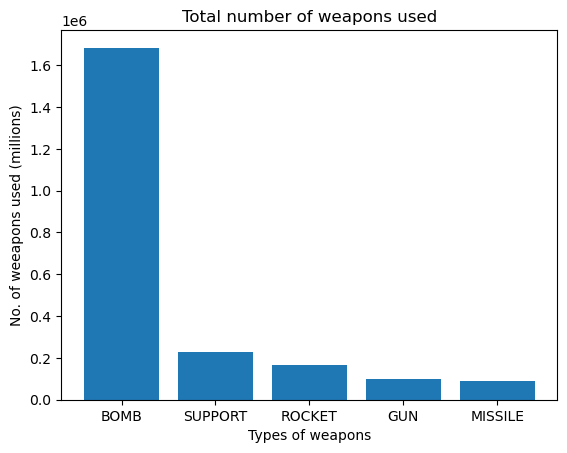

In [7]:
weapon_class_count = weapons.groupby('WEAPON_CLASS', sort=True)['WEAPON_COUNT'].sum()
weapon_class_count = weapon_class_count.sort_values(ascending=False)
fig, ax = plt.subplots()
ax.bar(weapon_class_count.index, weapon_class_count.values)
ax.set_title(label="Total number of weapons used")
ax.set_xlabel(xlabel="Types of weapons")
ax.set_ylabel(ylabel="No. of weeapons used (millions)")

## 2.2. Checking out weapons in used in operations

In [8]:
operations['WEAPONTYPECLASS'].unique() # Weapon class is not available in operations data

array([nan])

In [9]:
weapon_in_operations = operations['WEAPONTYPE'].unique() # At least weapon type is available
print(f"There are {len(weapon_in_operations)} types of weapon used")
print(weapon_in_operations[:5])

There are 295 types of weapon used
[nan 'BLU27 FIRE BOMB (750)' 'MK 82 GP BOMB (500) LD' 'CARGO (TONS)'
 'CBU24 AN PR/MT (BLU26)']


### We will mark WEAPONTYPECLASS using 'weapons' dataframe

In [10]:
weapon_type_and_class = weapons[['WEAPONTYPE', 'WEAPON_CLASS']]
weapon_type_and_class.head(5)

,WEAPONTYPE,WEAPON_CLASS
0,100 GP,BOMB
1,1000 G,BOMB
2,1000LB GP M-65,BOMB
3,1000LB MK-83,BOMB
4,1000LB SAP M59,BOMB


In [11]:
operations = operations.merge(weapon_type_and_class, on='WEAPONTYPE', how='left')

In [12]:
len(operations['WEAPON_CLASS'].notnull()) / len(operations['WEAPONTYPE'].notnull()) # verifies that all weapon type can be found in weapons

1.0

## 2.3. Dealing with coordinate data field
Since we are analyzing REGIONS with high UXO risk it is important that we need to know the locations so maybe we will drop all samples without the coordinate

In [13]:
total_entries = len(operations)
available_ratio = operations[operations != 'NaN'].count() / total_entries * 100
available_ratio.sort_values(ascending=False)

Unnamed: 0              100.000000
THOR_DATA_VIET_ID       100.000000
ADDITIONALINFO          100.000000
ID                      100.000000
WEAPONTYPEWEIGHT        100.000000
MFUNC_DESC_CLASS        100.000000
NUMWEAPONSJETTISONED    100.000000
NUMOFACFT               100.000000
NUMWEAPONSDELIVERED     100.000000
FLTHOURS                100.000000
NUMWEAPONSRETURNED      100.000000
WEAPONSLOADEDWEIGHT     100.000000
VALID_AIRCRAFT_ROOT     100.000000
SOURCERECORD            100.000000
SOURCEID                100.000000
MSNDATE                 100.000000
AIRCRAFT_ORIGINAL        99.989680
AIRCRAFT_ROOT            99.989680
UNIT                     99.989444
MILSERVICE               99.930434
COUNTRYFLYINGMISSION     99.922598
TAKEOFFLOCATION          99.893564
MISSIONID                99.664484
TIMEOFFTARGET            99.434119
TIMEONTARGET             99.434119
MFUNC                    97.835075
MFUNC_DESC               97.757759
PERIODOFDAY              95.722779
TGTCOUNTRY          

### We can see that 75% of the samples have  coordinate data, we should investigate why the other 25% samples don't have coordinate data

In [14]:
operations_with_coords = operations[operations['TGTLONDDD_DDD_WGS84'].notnull()]
operations_without_coords = operations[operations['TGTLONDDD_DDD_WGS84'].isnull()]

In [15]:
import pandas as pd

def TVD(df1, df2, column):
    dist1 = df1[column].value_counts(normalize=True)
    dist2 = df2[column].value_counts(normalize=True)

    all_categories = set(dist1.index).union(dist2.index)

    tvd = 0.5 * sum(abs(dist1.get(cat, 0) - dist2.get(cat, 0)) for cat in all_categories)
    return tvd

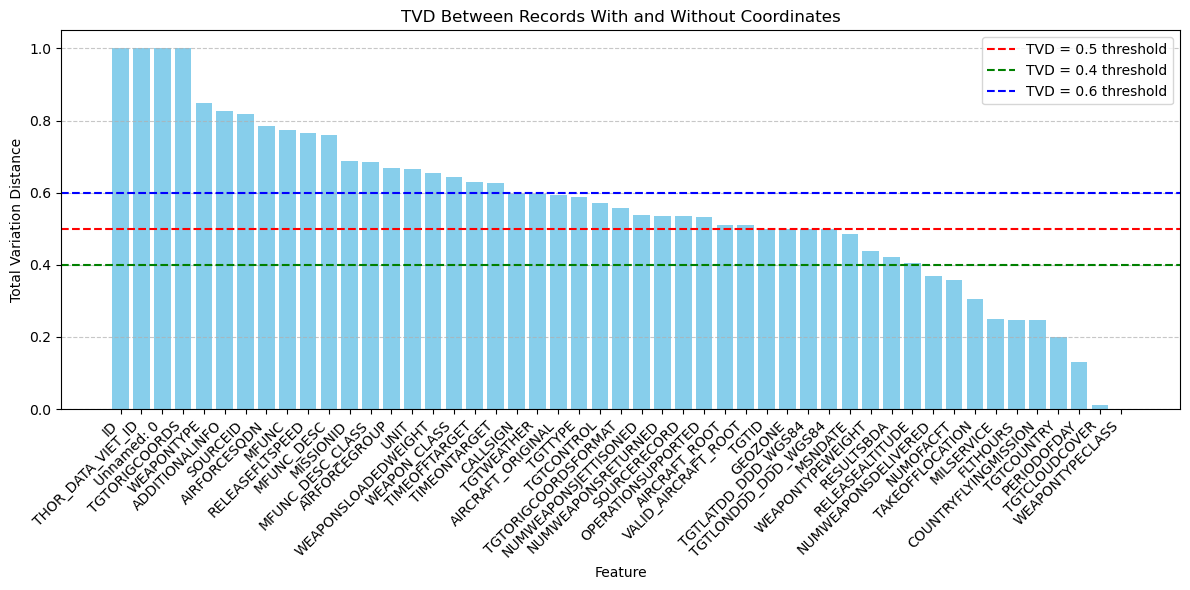

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(tvd_df['Column'], tvd_df['TVD'], color='skyblue')

# Add horizontal line
plt.axhline(y=0.5, color='red', linestyle='--', label='TVD = 0.5 threshold')
plt.axhline(y=0.4, color='green', linestyle='--', label='TVD = 0.4 threshold')
plt.axhline(y=0.6, color='blue', linestyle='--', label='TVD = 0.6 threshold')
# Labels and grid
plt.xlabel('Feature')
plt.ylabel('Total Variation Distance')
plt.title('TVD Between Records With and Without Coordinates')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


### We can see that the majority of TVD distance is over 40%
- Values like IDs have high uniqueness and doesn't contribute anything to TVD comparison so we will not include that in the mean TVD.
- Values like coordinate also behave like ID but are necessary, so instead of using raw coordinates, we use the GEOZONE feature.

In [35]:
scores = []
for col, score in zip(tvd_df['Column'], tvd_df['TVD']):
    if col in ['ID', 'THOR_DATA_VIET_ID', 'Unamed: 0', 'TGTORIGCOORDS', 'TGTLATDD_DDD_WGS84', 'TGTLONDDD_DDD_WGS84']:
        continue
    else:
        scores.append(score)

print(f"The mean TVD is: {np.mean(scores)}")

The mean TVD is: 0.5309907483479765


### High TVD indicates that the data is not missing at random so there might be some pattern here
- The high TVD scores across most features suggest that the data is not missing at random (NMAR) — there likely exists a systematic pattern in the missingness of coordinate data.
- The low TVD for WEAPONTYPE_CLASS indicates that this specific feature's distribution is relatively similar between the two groups (with and without coordinates), meaning weapon type alone does not explain the missingness.
- Therefore, the 25% of records with missing coordinates appear to differ significantly from the rest of the dataset in many other dimensions — they might reflect a different operational context, data collection procedure, or reporting bias.
### We need to further investigate the data based on coordinate to:
- See whether these missing cases represent non-dropped bombs, covert missions, different regions, or lower reporting standards.
- What potential impact excluding them might have on UXO risk analysis.

### Comparing feature availability between the sample group with coordinate and without coordinate

In [36]:
def checkAvailability(df):
    total_entries = len(df)
    available_ratio = df[df != 'NaN'].count() / total_entries * 100
    return available_ratio.sort_values(ascending=False)

In [37]:
ops_without_coords_availability = checkAvailability(operations_without_coords)
ops_with_coords_availability = checkAvailability(operations_with_coords)

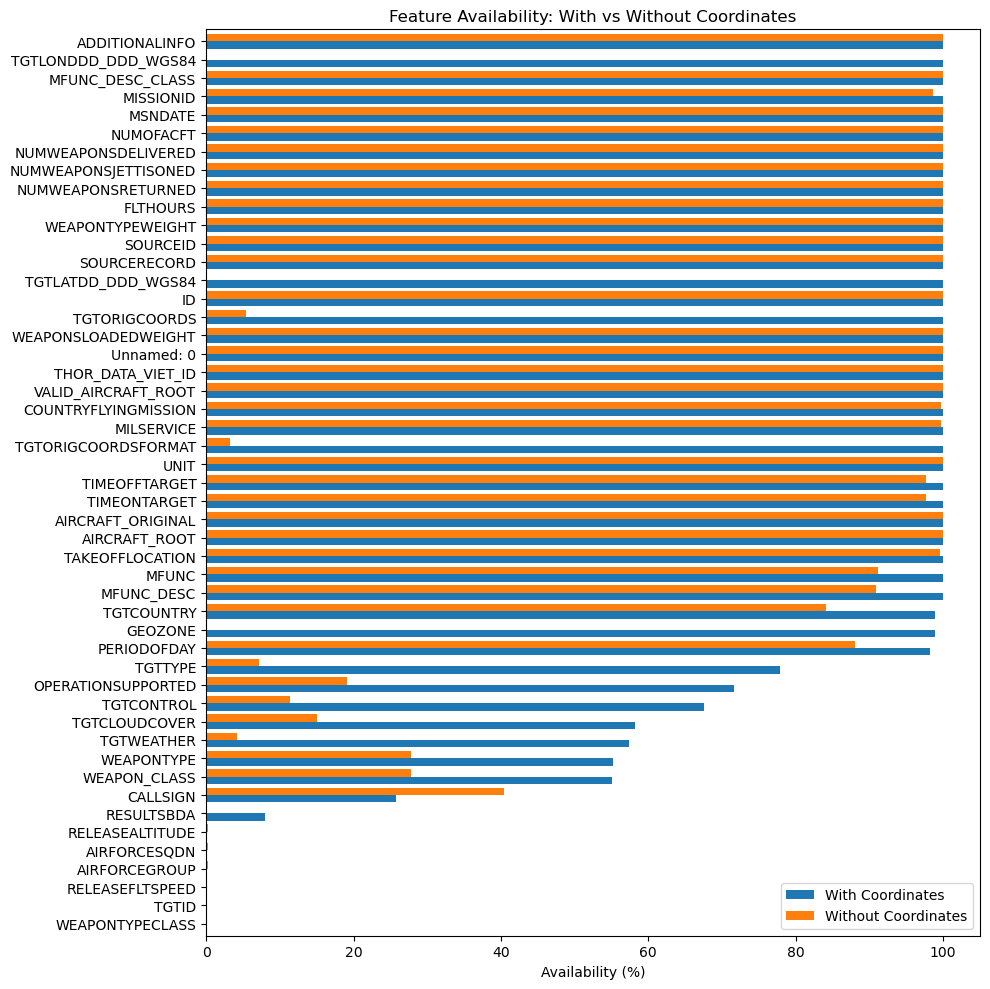

In [38]:
# Combine into one DataFrame
availability_df = pd.DataFrame({
    'With Coordinates': ops_with_coords_availability,
    'Without Coordinates': ops_without_coords_availability
}).fillna(0)  # Fill missing values with 0 in case some columns are not present

# Sort by availability in one group for consistent ordering
availability_df = availability_df.sort_values(by='With Coordinates')

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

availability_df.plot.barh(ax=ax, width=0.8)
ax.set_xlabel('Availability (%)')
ax.set_title('Feature Availability: With vs Without Coordinates')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

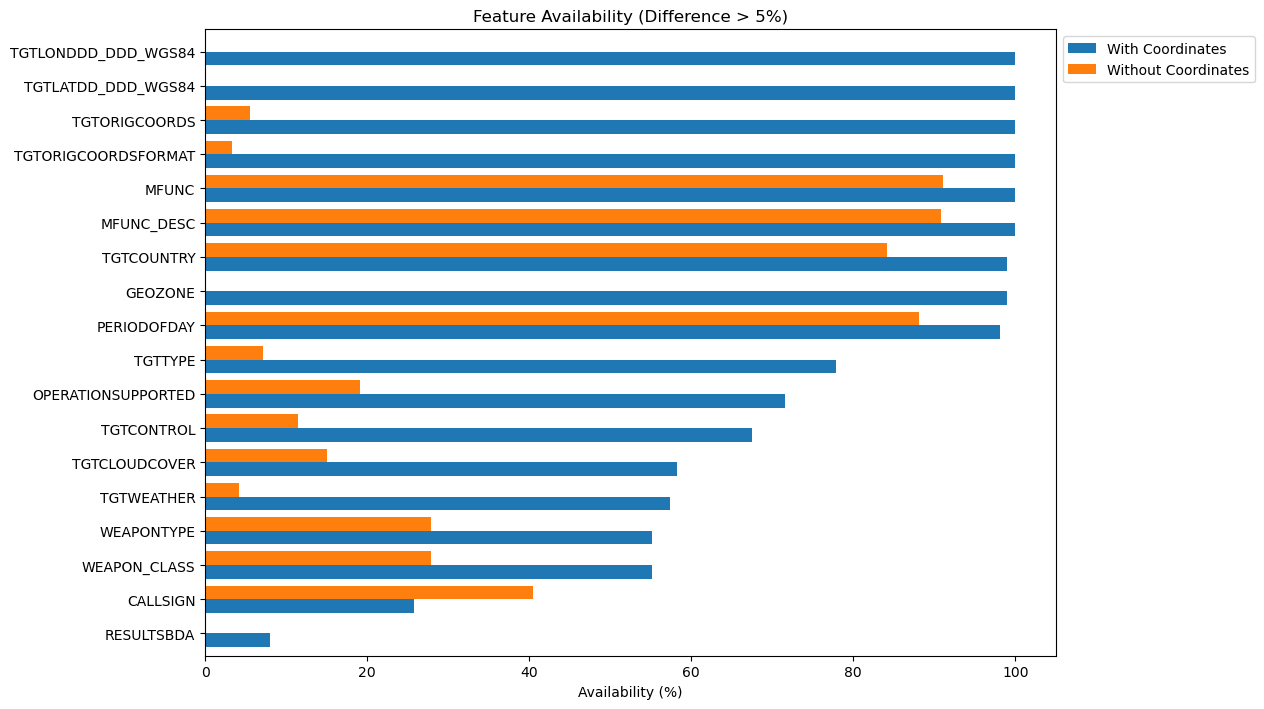

In [39]:
threshold = 5  # in percent

availability_df['Difference'] = (availability_df['With Coordinates'] - availability_df['Without Coordinates']).abs()

# Filter based on threshold
filtered_df = availability_df[availability_df['Difference'] > threshold].drop(columns='Difference')
filtered_df = filtered_df.sort_values(by='With Coordinates')

fig, ax = plt.subplots(figsize=(15, len(filtered_df) * 0.4))
filtered_df.plot.barh(ax=ax, width=0.8)
ax.set_xlabel('Availability (%)')
ax.set_title(f'Feature Availability (Difference > {threshold}%)')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

### The availability comparison shows that the sample group with missing coordinates still holds crucial information which are:
- Target Country: The data not only contains bombs dropped in Vietnam but also in other countries in the Indochina. Although we don't know where exactly the bomb was dropped but we still know it's somewhere in Vietnam and not other countries.
- WEAPON_TYPE and WEAPON_CLASS: In this graph we can see that the missing group's weapon availability is about half of the other group, this indicate that if we dropped this data we are missing on **1/3 of the weapons delieverd.**

### Investigating individual fields with high TVD
- We will investigate some fields that might explains why 25% of coordinate is missing and does the 25% missing data hold any importance in UXO risk analysis.

#### MFUCN_DESC

- These two graphs indicate that most missions with coordinates are attack missions, whereas those without coordinates are primarily non-combat operations such as training, maintenance, or reconnaissance — which typically do not involve bomb usage. Based on this insight, it may be reasonable to consider excluding missions without coordinates from further analysis.

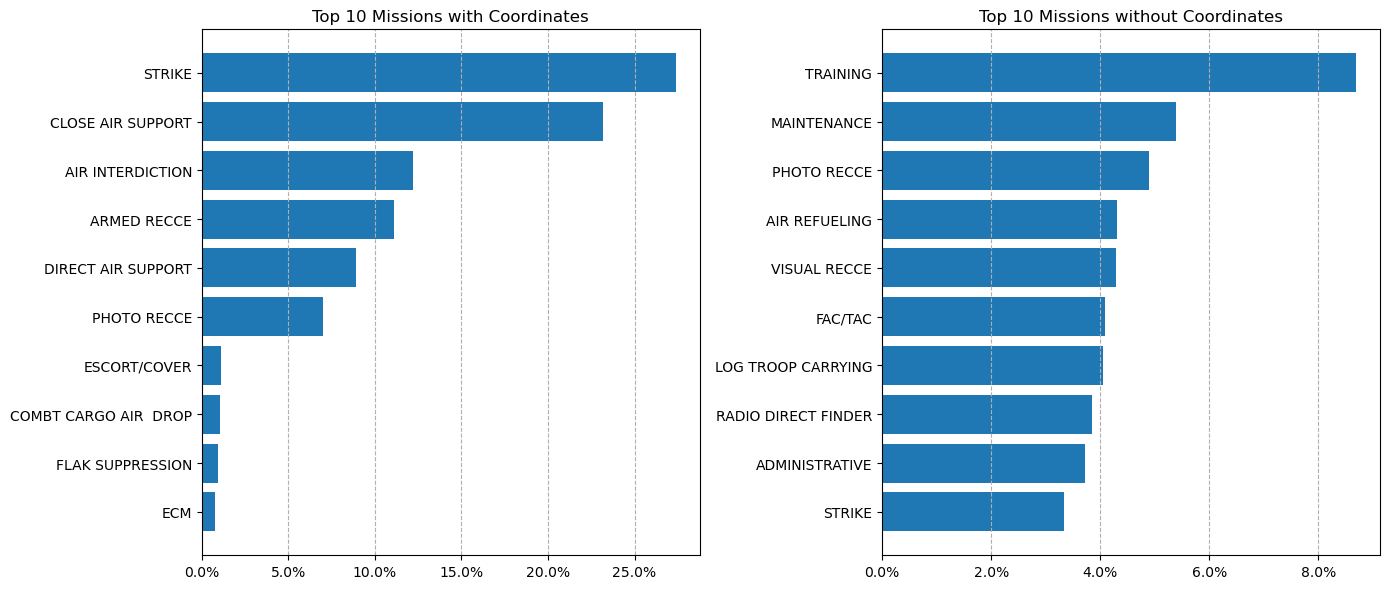

In [40]:
import matplotlib.ticker as mtick

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

top_mfunc_with_coords = (operations_with_coords['MFUNC_DESC'].value_counts() / len(operations_with_coords)).head(10)
axes[0].barh(top_mfunc_with_coords.index, top_mfunc_with_coords.values * 100.0)
axes[0].set_title('Top 10 Missions with Coordinates')
axes[0].invert_yaxis()
axes[0].grid(True, axis='x', linestyle='--')
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter())

top_mfunc_without_coords = (operations_without_coords['MFUNC_DESC'].value_counts() / len(operations_without_coords)).head(10)
axes[1].barh(top_mfunc_without_coords.index, top_mfunc_without_coords.values * 100.0)
axes[1].set_title('Top 10 Missions without Coordinates')
axes[1].invert_yaxis()
axes[1].grid(True, axis='x', linestyle='--')
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.show()


#### WEAPON_CLASS

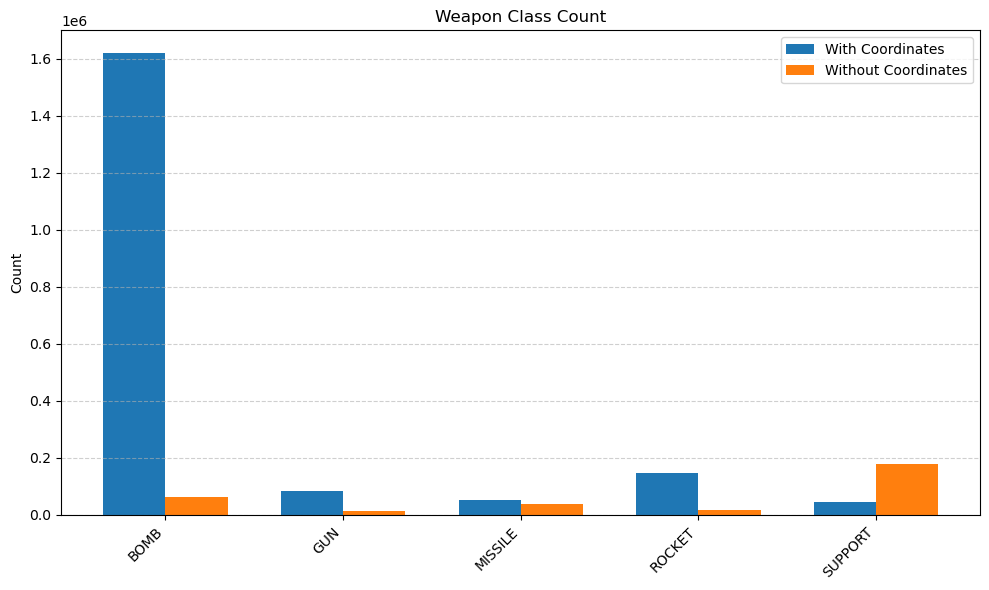

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Create count and proportion DataFrame
ops_weapon_class = pd.DataFrame({
    'with_coords': operations_with_coords['WEAPON_CLASS'].value_counts(),
    'without_coords': operations_without_coords['WEAPON_CLASS'].value_counts()
}).fillna(0)

# Set up positions and width for bar chart
categories = ops_weapon_class.index
x = np.arange(len(categories))
width = 0.35

# Create figure and plot the bar chart for raw counts
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width/2, ops_weapon_class['with_coords'], width, label='With Coordinates')
ax.bar(x + width/2, ops_weapon_class['without_coords'], width, label='Without Coordinates')

ax.set_title('Weapon Class Count')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()


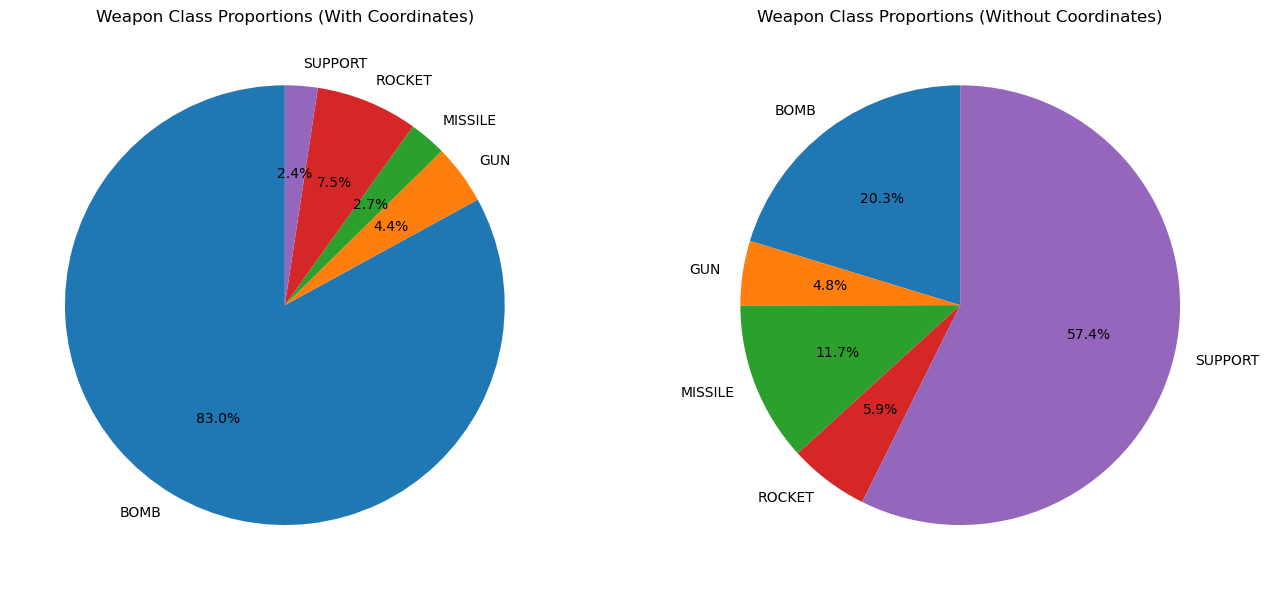

In [42]:
ops_weapon_class_prop = ops_weapon_class.div(ops_weapon_class.sum(axis=0), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(ops_weapon_class_prop['with_coords'], labels=ops_weapon_class_prop.index,
            autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors[:len(ops_weapon_class_prop.index)])
axes[0].set_title('Weapon Class Proportions (With Coordinates)')

axes[1].pie(ops_weapon_class_prop['without_coords'], labels=ops_weapon_class_prop.index,
            autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors[:len(ops_weapon_class_prop.index)])
axes[1].set_title('Weapon Class Proportions (Without Coordinates)')

plt.tight_layout()
plt.show()


#### MSNDATE

In [43]:
# Ensure you are working on a copy to avoid modifying a slice
operations_with_coords = operations_with_coords.copy()
operations_without_coords = operations_without_coords.copy()

# Now you can safely modify the 'YEAR' column
operations_with_coords.loc[:, 'YEAR'] = operations_with_coords['MSNDATE'].astype(str).str[:4].astype(int)
operations_without_coords.loc[:, 'YEAR'] = operations_without_coords['MSNDATE'].astype(str).str[:4].astype(int)

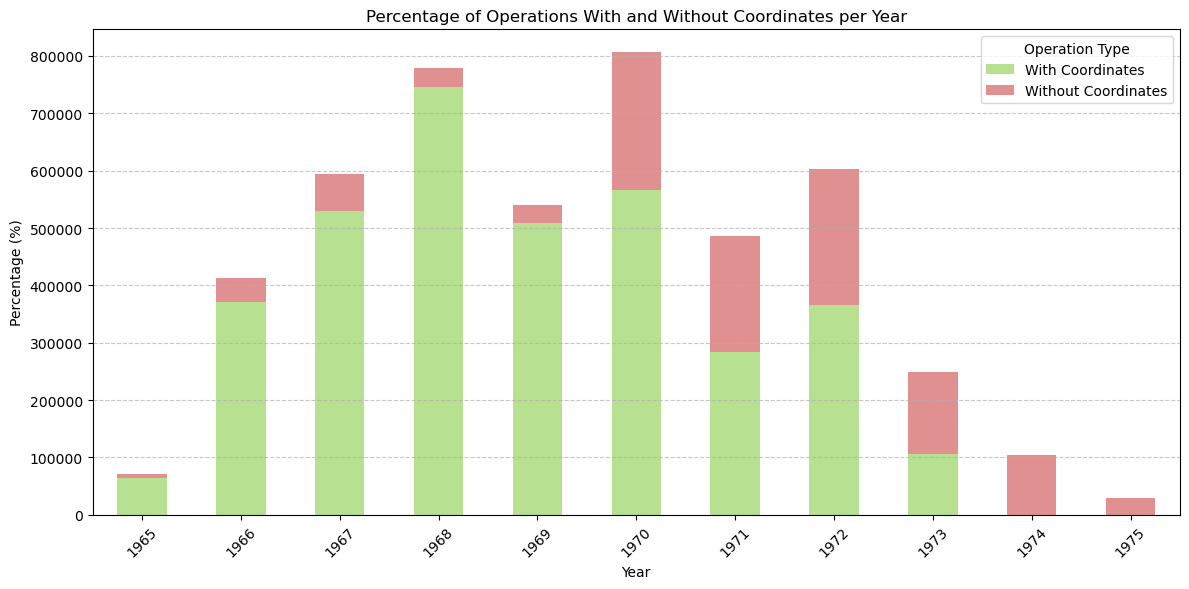

In [44]:
# Count per year for each group
count_with = operations_with_coords['YEAR'].value_counts()
count_without = operations_without_coords['YEAR'].value_counts()

# Combine into a single DataFrame, reindexing by all years seen in both
all_years = sorted(set(count_with.index).union(count_without.index))
df = pd.DataFrame({
    'With Coordinates': count_with,
    'Without Coordinates': count_without
}, index=all_years).fillna(0)


ax = df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#b7e090', '#e09090'])
plt.title('Percentage of Operations With and Without Coordinates per Year')
plt.ylabel('Percentage (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Operation Type')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### KINETIC MISISON vs NON-KINETIC MISSIONS
- Some missions might carry explosives but they might be just trasportation missions. This fields tells us whether the mission used the explosive for offensive purposes or not

In [64]:
strike_nonkinetic_count = operations.loc[
    (operations['MFUNC_DESC_CLASS'] == 'NONKINETIC') &
    (operations['MFUNC_DESC'] == 'STRIKE')
]

print(f"This simple query shows that no labeled as NONKINETIC is a STRIKE missions. \
The number of operations labeled as NONKINETIC and is a STRIKE MISSIONS is {len(strike_nonkinetic_count)}")

This simple query shows that no labeled as NONKINETIC is a STRIKE missions. The number of operations labeled as NONKINETIC and is a STRIKE MISSIONS is 0


In [55]:
kinetic_missions_with_coords = operations_with_coords[operations_with_coords['MFUNC_DESC_CLASS'] == 'KINETIC']
non_kinetic_missions_with_coords = operations_with_coords[operations_with_coords['MFUNC_DESC_CLASS'] == 'NONKINETIC']

kinetic_missions_without_coords = operations_without_coords[operations_without_coords['MFUNC_DESC_CLASS'] == 'KINETIC']
non_kinetic_missions_without_coords = operations_without_coords[operations_without_coords['MFUNC_DESC_CLASS'] == 'NONKINETIC']

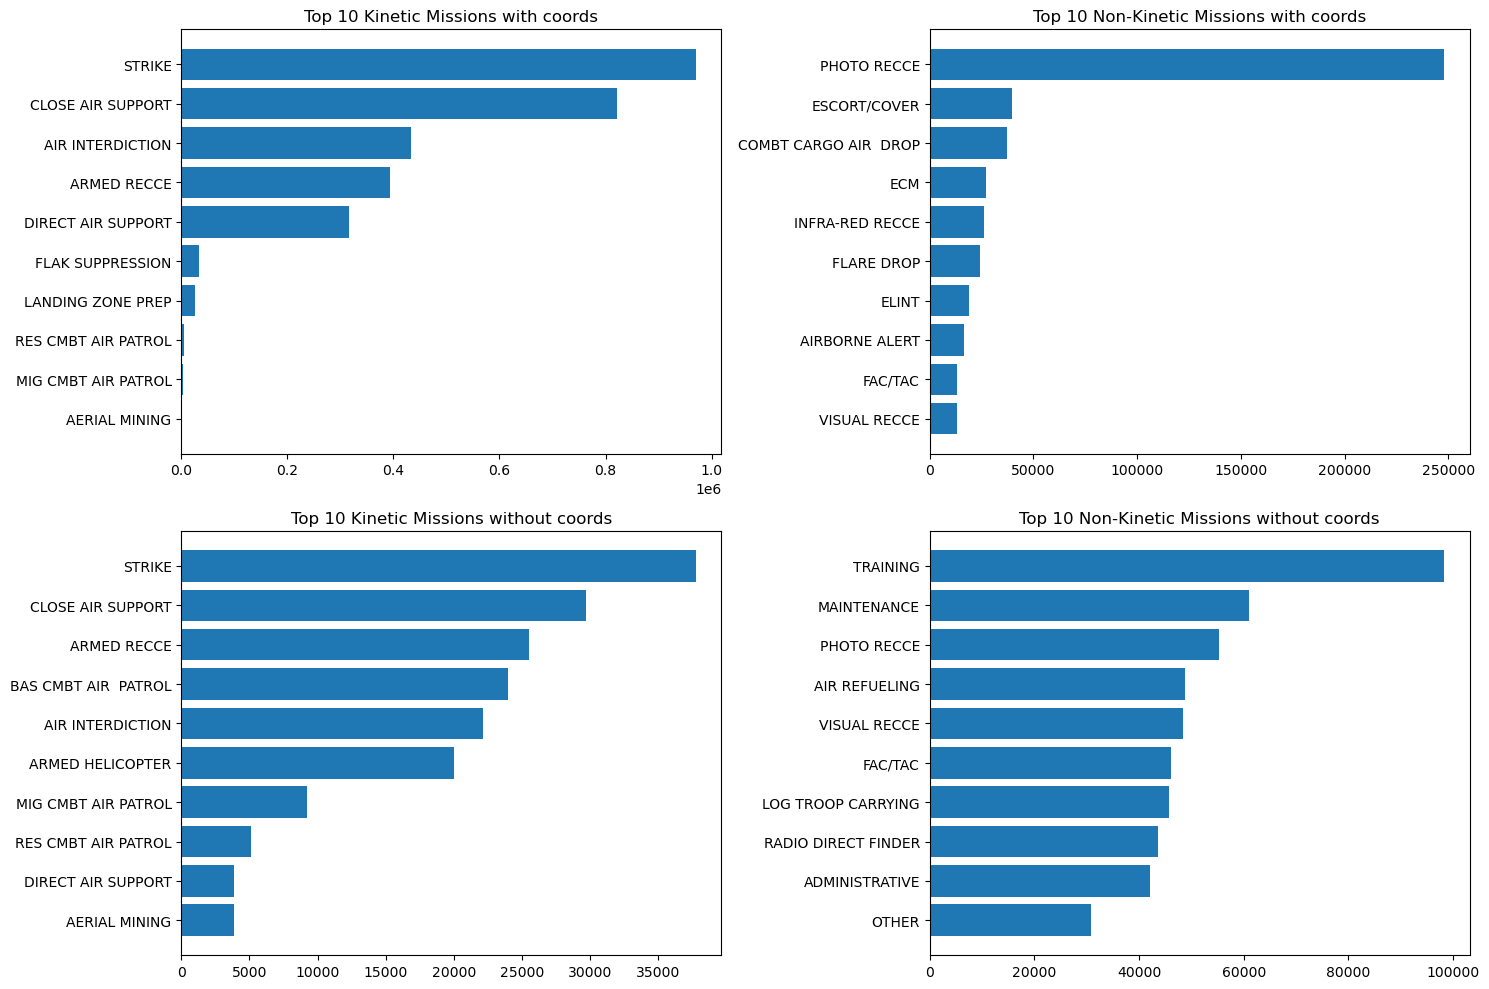

In [56]:
import matplotlib.pyplot as plt

top_kinetic_missions_with_coords = kinetic_missions_with_coords['MFUNC_DESC'].value_counts().head(10)
top_non_kinetic_missions_with_coords = non_kinetic_missions_with_coords['MFUNC_DESC'].value_counts().head(10)
top_kinetic_missions_without_coords = kinetic_missions_without_coords['MFUNC_DESC'].value_counts().head(10)
top_non_kinetic_missions_without_coords = non_kinetic_missions_without_coords['MFUNC_DESC'].value_counts().head(10)

top_kinetic_missions_with_coords = top_kinetic_missions_with_coords.iloc[::-1]
top_non_kinetic_missions_with_coords = top_non_kinetic_missions_with_coords.iloc[::-1]
top_kinetic_missions_without_coords = top_kinetic_missions_without_coords.iloc[::-1]
top_non_kinetic_missions_without_coords = top_non_kinetic_missions_without_coords.iloc[::-1]

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Bar plot for kinetic missions
ax[0][0].barh(top_kinetic_missions_with_coords.index, top_kinetic_missions_with_coords.values)
ax[0][0].set_title('Top 10 Kinetic Missions with coords')

# Bar plot for non-kinetic missions
ax[0][1].barh(top_non_kinetic_missions_with_coords.index, top_non_kinetic_missions_with_coords.values)
ax[0][1].set_title('Top 10 Non-Kinetic Missions with coords')

# Bar plot for kinetic missions
ax[1][0].barh(top_kinetic_missions_without_coords.index, top_kinetic_missions_without_coords.values)
ax[1][0].set_title('Top 10 Kinetic Missions without coords')

# Bar plot for non-kinetic missions
ax[1][1].barh(top_non_kinetic_missions_without_coords.index, top_non_kinetic_missions_without_coords.values)
ax[1][1].set_title('Top 10 Non-Kinetic Missions without coords')

plt.tight_layout()
plt.show()

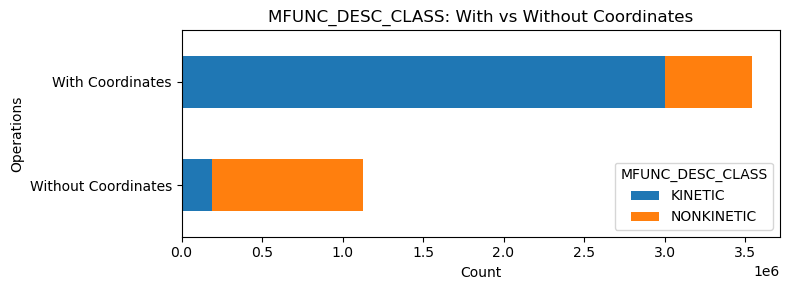

In [80]:
df_stacked = pd.DataFrame({
    'Without Coordinates': operations_without_coords['MFUNC_DESC_CLASS'].value_counts(),
    'With Coordinates': operations_with_coords['MFUNC_DESC_CLASS'].value_counts()
}).T

df_stacked.plot(kind='barh', stacked=True, figsize=(8, 3))  # barh instead of bar

plt.title('MFUNC_DESC_CLASS: With vs Without Coordinates')
plt.xlabel('Count')
plt.ylabel('Operations')
plt.legend(title='MFUNC_DESC_CLASS')
plt.tight_layout()
plt.show()


### CONCLUSION: 
- The majority of data with missiong coordinate doesn't contain bomb, if it does they are mostly NONKINETIC missions that are responsible explosives transportation and such.
- Data with missing coordinates has no value in spatial analysis.
- However, many missions without coordinates still carries a great amount of explosives so we it can be useful for statistical analysis.
- Besides, we cannot rule out the probability of UXO being dropped by non combative missions.

## 3. Analysis

### Plotting the operations with coords

I will extract a few columns from data of operations with coordinates to plot in kepler.gl, since kepler.gl can't handle large files.

In [111]:
operations_with_coords.columns

Index(['Unnamed: 0', 'THOR_DATA_VIET_ID', 'COUNTRYFLYINGMISSION', 'MILSERVICE',
       'MSNDATE', 'SOURCEID', 'SOURCERECORD', 'VALID_AIRCRAFT_ROOT',
       'TAKEOFFLOCATION', 'TGTLATDD_DDD_WGS84', 'TGTLONDDD_DDD_WGS84',
       'TGTTYPE', 'NUMWEAPONSDELIVERED', 'TIMEONTARGET', 'WEAPONTYPE',
       'WEAPONTYPECLASS', 'WEAPONTYPEWEIGHT', 'AIRCRAFT_ORIGINAL',
       'AIRCRAFT_ROOT', 'AIRFORCEGROUP', 'AIRFORCESQDN', 'CALLSIGN',
       'FLTHOURS', 'MFUNC', 'MFUNC_DESC', 'MISSIONID', 'NUMOFACFT',
       'OPERATIONSUPPORTED', 'PERIODOFDAY', 'UNIT', 'TGTCLOUDCOVER',
       'TGTCONTROL', 'TGTCOUNTRY', 'TGTID', 'TGTORIGCOORDS',
       'TGTORIGCOORDSFORMAT', 'TGTWEATHER', 'ADDITIONALINFO', 'GEOZONE', 'ID',
       'MFUNC_DESC_CLASS', 'NUMWEAPONSJETTISONED', 'NUMWEAPONSRETURNED',
       'RELEASEALTITUDE', 'RELEASEFLTSPEED', 'RESULTSBDA', 'TIMEOFFTARGET',
       'WEAPONSLOADEDWEIGHT', 'WEAPON_CLASS', 'YEAR'],
      dtype='object')

In [114]:
selected_columns = [
    'TGTLATDD_DDD_WGS84', 'TGTLONDDD_DDD_WGS84', 'MSNDATE', 'NUMWEAPONSDELIVERED', 'NUMOFACFT', 
    'OPERATIONSUPPORTED', 'PERIODOFDAY', 'TGTCOUNTRY', 'TGTWEATHER', 'WEAPON_CLASS', 'YEAR',
    'MFUNC_DESC', 'MFUNC_DESC_CLASS'
]

# Rename latitude and longitude columns
renamed_df = operations_with_coords[selected_columns].rename(columns={
    'TGTLATDD_DDD_WGS84': 'lat',
    'TGTLONDDD_DDD_WGS84': 'lon'
})

# Export to CSV
renamed_df.to_csv('plot/ops_coords.csv', index=False)


In [82]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('plot/mission_locations.png')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


By looking at the plot of flight missions we can see the following things:
- The bombming pattern follows certain areas, or along certain targets along rivers, we can assume that most target are related to supply transportation.
- There are certain city were targeted like Phonsavan city in Laos, Ho Chi Minh city, the Central Region of Vietnam, and along Vietnam's coast line

### Finding the dud rate of explosives
Dud rate is the probability of an explosive not exploding when deployed. It is said that the dud rate of bombs range between 10% to 40% but we have no credible source for this. We need to figure out how to determine the dud rate. Luckily, we have sample data from UXO diffusal from Quảng Trị Mine Action Center (QTMAC) publicly available. 

Quang Tri Mine action center: https://qtmac.vn/vi/du-lieu-va-so-lieu/ra-pha-bom-min

In [35]:
qtmac = pd.read_csv('data/qtmac_data.csv')

In [36]:
qtmac.head()

,location,weapon_class,weapon_count
0,hai lang,cluster bomb,49500
1,hai lang,bomb and carpet bomb,277
2,hai lang,mortar,12002
3,hai lang,rocket,950
4,hai lang,firearm munition,16534


In [37]:
qtmac[qtmac['weapon_class'].isin(['bomb and carpet bomb', 'cluster bomb'])]['weapon_count'].sum()

388688

#### Finding the minimum dud rate
- Cite source for formula